# SciPy Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Basics

### Optimization

In [2]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^{2}$

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, 2)# the second parameter is a guess value

In [4]:
res 
#fun: the minimum value of the function
#x: the value of x at which the minimum value is attained

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [5]:
res.x

array([2.99999999])

In [6]:
res.x[0]

2.999999992549203

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

<img src='opt.png' width="400" height="400">

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [7]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2}) # a tuple of dictionaries with all functions >= 0 of type inequality

bnds = ((0, None), (0, None)) # x and y bounds are (0, None) and (0, None). Here None means no upper bound or infinity!

res = minimize(f, (2, 0), bounds=bnds, constraints=cons)# giving guess values as (2, 0) for (x, y)

In [8]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [9]:
res.x

array([1.4, 1.7])

In [10]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is an 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) 

#### Note use of different techniques for different problems.

In [11]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see h

### Interpolation

Suppose you have the following data (I generate it here, but perhaps you collect $x$ and $y$ by means of some experiment)

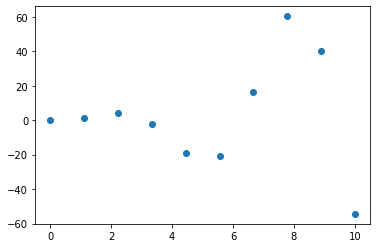

In [12]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [13]:
from scipy.interpolate import interp1d

In [14]:
f = interp1d(x, y, kind="linear")
x_dense = np.linspace(0, 10, 200)
y_dense = f(x_dense)

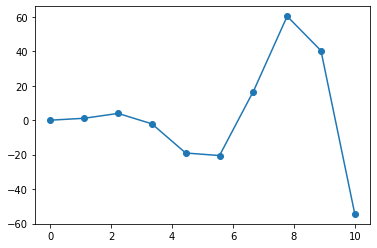

In [15]:
plt.plot(x_dense, y_dense)
plt.scatter(x,y)

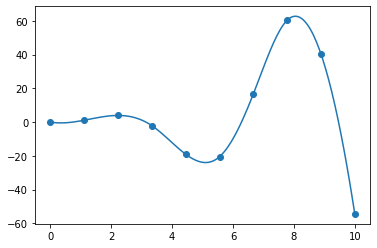

In [16]:
f = interp1d(x, y, kind="cubic")
x_dense = np.linspace(0, 10, 200)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)
plt.scatter(x,y)

### Curve Fitting

#### Trivial Example

In [17]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

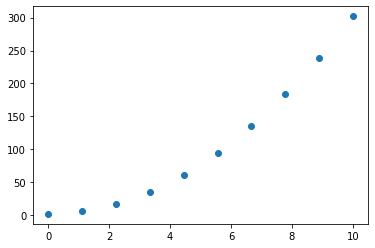

In [18]:
plt.scatter(x_data, y_data)

Want to fit the data to a curve $y = ax^{2} + b$. The main goal here is to determine the values of $a$ and $b$.

In [19]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0=(1,0)) #popt: optimal parameters, pcov: sth to do with covariance

In [20]:
popt #the values of the parameters (here, a and b)

array([3., 2.])

In [21]:
pcov #covariance matrix gives an estimate on the errors in the parameters and also how the parameters are related

array([[ 2.39622721e-33, -8.43116971e-32],
       [-8.43116971e-32,  5.59996225e-30]])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data.

In [22]:
# sample data

t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

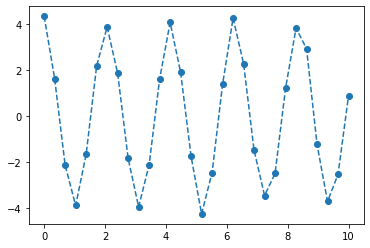

In [23]:
plt.plot(t_data,y_data,'o--')

$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial $guess$ is

* $\omega = 2 \pi (1/2) = \pi$
* $A=4$
* $\phi = 0$

In [24]:
def func(t, A, w, phi):
    return A*np.cos(w*t + phi)

#finding the parameters
popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))

In [25]:
popt #the optimal parameters

array([3.94836219, 2.99899521, 0.10411352])

In [26]:
pcov

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

In [27]:
A, w, phi = popt

In [28]:
t = np.linspace(0, 10, 200)
y = func(t, A, w, phi)

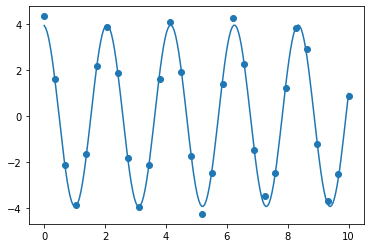

In [29]:
plt.scatter(t_data, y_data)
plt.plot(t, y)

The estimated errors of the parameters

In [30]:
np.sqrt(np.diag(pcov)) # in the order A, w, phi

array([0.05117448, 0.00430857, 0.02575701])

## Special Functions

Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

* The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

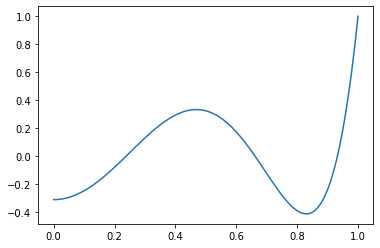

In [31]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x)) # here 6 is the value of 'l' for the Legendre Equation
plt.show()

Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

* Laplace's Equation in Polar Coordinates

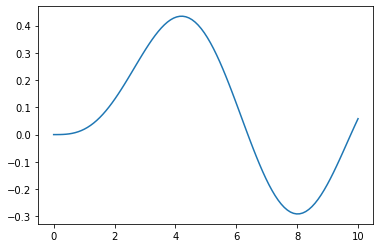

In [32]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x)) # 3 is the value of 'alpha'
plt.show()

## Calculus

### Differentiation

In [33]:
from scipy.misc import derivative

In [34]:
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)

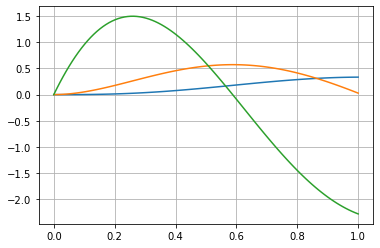

In [35]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6)) # dx is the small separation
plt.plot(x, derivative(f, x, dx=1e-6, n=2)) # n is the number of times you want to differentiate (here, second derivative)
plt.grid()

### Integration

#### Single Integrals

$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [36]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1) #0, 1 are the bounds of the integral

In [37]:
integral

0.14558175869954834

In [38]:
integral_error

1.6162822047366225e-15

#### Double Integrals

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [39]:
from scipy.integrate import dblquad #double quad
integrand = lambda x, y: np.sin(x+y**2)
lwr_y = lambda x: -x # lower bound of y
upr_y = lambda x: x**2 # upper bound of y
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y) # note the order in which bounds should be given

In [40]:
integral

0.315802507240474

In [41]:
integral_error

1.5634600713498928e-14

#### n Integrals

In [42]:
from scipy.integrate import nquad
nquad?

Signature: nquad(func, ranges, args=None, opts=None, full_output=False)
Docstring:
Integration over multiple variables.

Wraps `quad` to enable integration over multiple variables.
Various options allow improved integration of discontinuous functions, as
well as the use of weighted integration, and generally finer control of the
integration process.

Parameters
----------
func : {callable, scipy.LowLevelCallable}
    The function to be integrated. Has arguments of ``x0, ... xn``,
    ``t0, ... tm``, where integration is carried out over ``x0, ... xn``,
    which must be floats.  Where ```t0, ... tm``` are extra arguments
    passed in args.
    Function signature should be ``func(x0, x1, ..., xn, t0, t1, ..., tm)``.
    Integration is carried out in order.  That is, integration over ``x0``
    is the innermost integral, and ``xn`` is the outermost.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

   

### Differential Equations

#### First Order ODEs

Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [43]:
from scipy.integrate import odeint # other libraries are solve_ivp

All information about the DE

In [44]:
def dvdt(v, t):
    return 5*v**2 - 7 # setting values for alpha = 5 and beta = 7
v0 = 0 # condition is given

Solve the DE

In [45]:
t = np.linspace(0, 10, 1000)
sol = odeint(dvdt, v0, t)

In [46]:
sol

array([[ 0.        ],
       [-0.06998829],
       [-0.13948853],
       [-0.20802619],
       [-0.27515298],
       [-0.34045813],
       [-0.40357748],
       [-0.46420028],
       [-0.52207322],
       [-0.57700218],
       [-0.62885106],
       [-0.67753934],
       [-0.7230374 ],
       [-0.76536108],
       [-0.80456536],
       [-0.84073788],
       [-0.87399243],
       [-0.90446268],
       [-0.93229664],
       [-0.95765162],
       [-0.9806898 ],
       [-1.00157461],
       [-1.02046772],
       [-1.03752673],
       [-1.05290337],
       [-1.06674222],
       [-1.0791798 ],
       [-1.09034407],
       [-1.10035415],
       [-1.10932038],
       [-1.11734439],
       [-1.12451941],
       [-1.13093066],
       [-1.13665576],
       [-1.1417652 ],
       [-1.14632286],
       [-1.15038646],
       [-1.15400809],
       [-1.15723464],
       [-1.16010828],
       [-1.16266688],
       [-1.16494438],
       [-1.16697122],
       [-1.1687746 ],
       [-1.17037888],
       [-1

In [47]:
sol.T

array([[ 0.        , -0.06998829, -0.13948853, -0.20802619, -0.27515298,
        -0.34045813, -0.40357748, -0.46420028, -0.52207322, -0.57700218,
        -0.62885106, -0.67753934, -0.7230374 , -0.76536108, -0.80456536,
        -0.84073788, -0.87399243, -0.90446268, -0.93229664, -0.95765162,
        -0.9806898 , -1.00157461, -1.02046772, -1.03752673, -1.05290337,
        -1.06674222, -1.0791798 , -1.09034407, -1.10035415, -1.10932038,
        -1.11734439, -1.12451941, -1.13093066, -1.13665576, -1.1417652 ,
        -1.14632286, -1.15038646, -1.15400809, -1.15723464, -1.16010828,
        -1.16266688, -1.16494438, -1.16697122, -1.1687746 , -1.17037888,
        -1.1718058 , -1.17307479, -1.1742032 , -1.17520647, -1.1760984 ,
        -1.17689127, -1.17759603, -1.17822242, -1.17877913, -1.17927388,
        -1.17971354, -1.18010423, -1.18045138, -1.18075985, -1.18103393,
        -1.18127746, -1.18149382, -1.18168605, -1.18185683, -1.18200856,
        -1.18214336, -1.18226312, -1.18236951, -1.1

In [48]:
sol.T[0]

array([ 0.        , -0.06998829, -0.13948853, -0.20802619, -0.27515298,
       -0.34045813, -0.40357748, -0.46420028, -0.52207322, -0.57700218,
       -0.62885106, -0.67753934, -0.7230374 , -0.76536108, -0.80456536,
       -0.84073788, -0.87399243, -0.90446268, -0.93229664, -0.95765162,
       -0.9806898 , -1.00157461, -1.02046772, -1.03752673, -1.05290337,
       -1.06674222, -1.0791798 , -1.09034407, -1.10035415, -1.10932038,
       -1.11734439, -1.12451941, -1.13093066, -1.13665576, -1.1417652 ,
       -1.14632286, -1.15038646, -1.15400809, -1.15723464, -1.16010828,
       -1.16266688, -1.16494438, -1.16697122, -1.1687746 , -1.17037888,
       -1.1718058 , -1.17307479, -1.1742032 , -1.17520647, -1.1760984 ,
       -1.17689127, -1.17759603, -1.17822242, -1.17877913, -1.17927388,
       -1.17971354, -1.18010423, -1.18045138, -1.18075985, -1.18103393,
       -1.18127746, -1.18149382, -1.18168605, -1.18185683, -1.18200856,
       -1.18214336, -1.18226312, -1.18236951, -1.18246402, -1.18

Plot

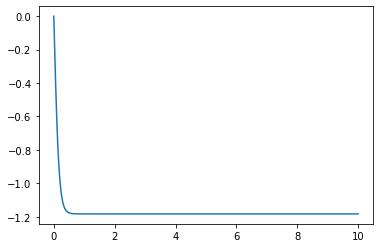

In [49]:
v_sol = sol.T[0]
plt.plot(t, v_sol)

**Coupled first order ODEs**

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [50]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2 + 3*x,
            3*y1 + y2**3 - np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = [y1_0, y2_0]

In [51]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [52]:
sol

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [53]:
sol.T

array([[ 0.00000000e+00,  1.53914061e-04,  6.19093356e-04,
         1.40076628e-03,  2.50418953e-03,  3.93464633e-03,
         5.69744401e-03,  7.79789517e-03,  1.02413187e-02,
         1.30330245e-02,  1.61783065e-02,  1.96824391e-02,
         2.35506573e-02,  2.77881638e-02,  3.24001125e-02,
         3.73915921e-02,  4.27676179e-02,  4.85331404e-02,
         5.46930282e-02,  6.12520553e-02,  6.82148995e-02,
         7.55861308e-02,  8.33702071e-02,  9.15714669e-02,
         1.00194121e-01,  1.09242251e-01,  1.18719801e-01,
         1.28630571e-01,  1.38978219e-01,  1.49766252e-01,
         1.60998020e-01,  1.72676732e-01,  1.84805434e-01,
         1.97387014e-01,  2.10424222e-01,  2.23919648e-01,
         2.37875730e-01,  2.52294784e-01,  2.67178978e-01,
         2.82530347e-01,  2.98350829e-01,  3.14642248e-01,
         3.31406342e-01,  3.48644774e-01,  3.66359140e-01,
         3.84551013e-01,  4.03221942e-01,  4.22373488e-01,
         4.42007253e-01,  4.62124894e-01,  4.82728181e-0

In [54]:
y1, y2 = [sol.T[0], sol.T[1]]

In [55]:
y1

array([0.00000000e+00, 1.53914061e-04, 6.19093356e-04, 1.40076628e-03,
       2.50418953e-03, 3.93464633e-03, 5.69744401e-03, 7.79789517e-03,
       1.02413187e-02, 1.30330245e-02, 1.61783065e-02, 1.96824391e-02,
       2.35506573e-02, 2.77881638e-02, 3.24001125e-02, 3.73915921e-02,
       4.27676179e-02, 4.85331404e-02, 5.46930282e-02, 6.12520553e-02,
       6.82148995e-02, 7.55861308e-02, 8.33702071e-02, 9.15714669e-02,
       1.00194121e-01, 1.09242251e-01, 1.18719801e-01, 1.28630571e-01,
       1.38978219e-01, 1.49766252e-01, 1.60998020e-01, 1.72676732e-01,
       1.84805434e-01, 1.97387014e-01, 2.10424222e-01, 2.23919648e-01,
       2.37875730e-01, 2.52294784e-01, 2.67178978e-01, 2.82530347e-01,
       2.98350829e-01, 3.14642248e-01, 3.31406342e-01, 3.48644774e-01,
       3.66359140e-01, 3.84551013e-01, 4.03221942e-01, 4.22373488e-01,
       4.42007253e-01, 4.62124894e-01, 4.82728181e-01, 5.03819005e-01,
       5.25399429e-01, 5.47471735e-01, 5.70038442e-01, 5.93102385e-01,
      

In [56]:
y2

array([ 0.        , -0.01009927, -0.0201882 , -0.03025632, -0.04029308,
       -0.05028784, -0.06022984, -0.07010824, -0.07991207, -0.08963025,
       -0.09925158, -0.10876475, -0.1181583 , -0.12742067, -0.13654013,
       -0.14550483, -0.15430276, -0.16292176, -0.17134949, -0.17957349,
       -0.18758109, -0.19535947, -0.2028956 , -0.21017629, -0.21718816,
       -0.22391762, -0.23035091, -0.23647404, -0.24227286, -0.24773298,
       -0.25283984, -0.25757866, -0.26193448, -0.26589214, -0.2694363 ,
       -0.27255142, -0.27522179, -0.27743156, -0.27916469, -0.28040501,
       -0.28113622, -0.2813419 , -0.28100554, -0.28011053, -0.27864019,
       -0.2765778 , -0.27390662, -0.27060987, -0.26667082, -0.26207275,
       -0.25679897, -0.25083288, -0.24415797, -0.2367578 , -0.22861607,
       -0.21971655, -0.21004318, -0.19957999, -0.18831112, -0.17622082,
       -0.16329341, -0.14951323, -0.13486464, -0.11933195, -0.10289936,
       -0.08555086, -0.06727014, -0.04804052, -0.02784475, -0.00

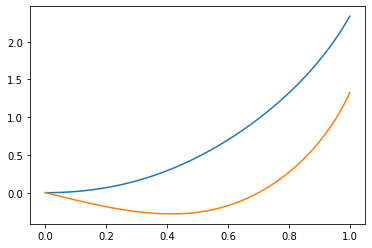

In [57]:
plt.plot(x, y1)
plt.plot(x, y2)

**Second Order ODEs**

Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$

Scipy can only solve coupled first order ODEs, but **any second order ODE can be turned into two coupled first order ODEs**. The same thing goes for higher order ODEs. 

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$
$$d \theta / dt = \omega $$

Let $S = (\theta, \omega)$

In [58]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
            np.sin(theta)]

theta_0 = np.pi/4 # setting initial angle of the pendulum as pi/4
omega_0 = 0 # initial angular velocity is zero
S_0 = [theta_0, omega_0]

In [59]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S_0, t)
theta, omega = sol.T

In [60]:
theta

array([0.78539816, 0.79986207, 0.84366606, 0.91802008, 1.02483987,
       1.16655539, 1.34576295, 1.56465214, 1.8241588 , 2.12288479,
       2.4560094 , 2.81464874, 3.18620797, 3.55597383, 3.909537  ,
       4.23509027, 4.52473432, 4.77455111, 4.98380505, 5.15382323,
       5.28695896, 5.38581128, 5.45271189, 5.48942068, 5.49696242,
       5.47555266, 5.42458391, 5.34266614, 5.22773847, 5.07729222,
       4.88876634, 4.66018347, 4.39106169, 4.08352608, 3.74333932,
       3.38035106, 3.00785089, 2.64071279, 2.29290655, 1.97537606,
       1.69503381, 1.45494359, 1.25524424, 1.09427737, 0.96957062,
       0.87855116, 0.81900266, 0.78933015, 0.78869816, 0.8170886 ,
       0.87530193, 0.96490209, 1.08808262, 1.24740867, 1.44536988,
       1.68367901, 1.96229927, 2.27831737, 2.62500044, 2.99156934,
       3.36414856, 3.72785062, 4.06927009, 4.378384  , 4.64925393,
       4.87961502, 5.06985915, 5.2219193 , 5.33834626, 5.42166079,
       5.47394904, 5.49663335, 5.49035672, 5.4549397 , 5.38939

In [61]:
omega

array([ 0.        ,  0.14353491,  0.29113002,  0.44657046,  0.61297803,
        0.79219416,  0.98383729,  1.1840293 ,  1.38402847,  1.56944163,
        1.72113729,  1.81886502,  1.84722038,  1.80137298,  1.68905116,
        1.52740843,  1.33690839,  1.13576818,  0.93702812,  0.74815791,
        0.57207156,  0.40851435,  0.25526642,  0.10900176, -0.03415969,
       -0.17830129, -0.32744485, -0.48525896, -0.65462636, -0.83695629,
       -1.0311572 , -1.23230574, -1.43033784, -1.60955433, -1.75011713,
       -1.83234228, -1.84291975, -1.78003772, -1.65413218, -1.48373821,
       -1.28920537, -1.08767029, -0.8908038 , -0.70486645, -0.53188985,
       -0.37105234, -0.21980449, -0.07464707,  0.06837535,  0.21335467,
        0.36425816,  0.52461363,  0.69702595,  0.88241339,  1.07889696,
        1.28042987,  1.47559161,  1.64745803,  1.77573333,  1.8416702 ,
        1.83436287,  1.7550635 ,  1.61666407,  1.43870528,  1.24112872,
        1.0398648 ,  0.84522385,  0.66232901,  0.49241004,  0.33

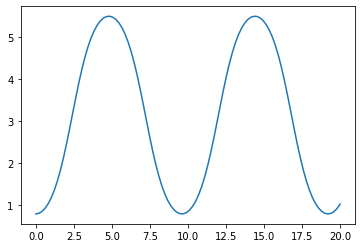

In [62]:
plt.plot(t, theta) #the actual solution
plt.show()

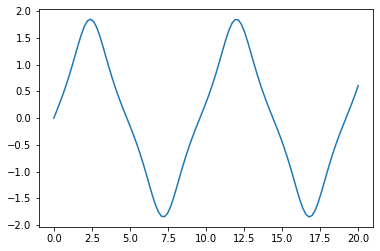

In [63]:
plt.plot(t, omega)

### Fourier Transforms

The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$

* $k/N$ represents a specific frequency (dimensionless)
* can be converted to a frequency (Hz) if you know the spacing in $x$

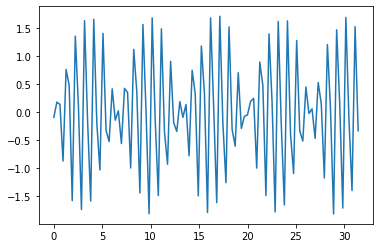

In [64]:
# a time series
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(x, y)

In [65]:
from scipy.fft import fft, fftfreq #fast fourier transform
N = len(y)
yf = fft(y)[:N//2] # "//" is floor division same as math.floor() {https://www.freecodecamp.org/news/what-does-double-slash-mean-in-python/}
xf = fftfreq(N, np.diff(x)[0])[:N//2] # delta t of the time series

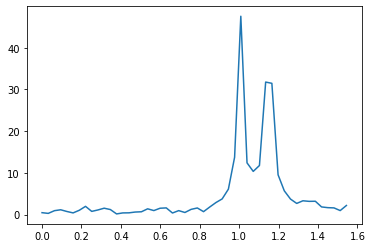

In [66]:
plt.plot(xf, np.abs(yf))
plt.show()

### Examples

**Example 1**. The energy required to get from point $\vec{r}_1$ to point $\vec{r}_2$ for an airplane is given by

$$ E = \alpha \int_{C} \left| \frac{d\vec{r}}{dt} \right| dt - \int_C \vec{F} \cdot \frac{d\vec{r}}{dt}dt $$

Suppose that $\alpha=5$ and our start and ends points are $\vec{r}_1 = (0,0)$ and $\vec{r}_2 = (0, 10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Find the optimal value of $A$ in $\vec{r}(t) = A\sin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the work. 

Then $x=A\sin(\pi t/10)$, $y=t$, and

$$\left| \frac{d\vec{r}}{dt} \right| = \sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)}$$

$$\vec{F} \cdot \frac{d\vec{r}}{dt} = \begin{bmatrix} 0 \\ -2/(A\sin(\pi t/10) +1)^2\\ \end{bmatrix} \cdot \begin{bmatrix} \pi A/10 \cos(\pi t/10)\\ 1\\ \end{bmatrix} = -2/(A\sin(\pi t/10) +1)^2 $$

so that

$$ E = \int_{0}^{10} \left(5\sqrt{1+(\pi A /10)^2 \cos^2(\pi t/10)} + \frac{2}{(A\sin(\pi t/10) +100)^2}  \right) dt$$

In [67]:
def f(A): 
    integrand = lambda t: 2 / (1 + np.abs(A*np.sin(np.pi*t/10)))**2 + 5*np.sqrt(1+(np.pi*A/10)**2 * np.cos(np.pi * t / 10)**2)
    return quad(integrand, 0, 10)[0]

res = minimize(f, 0.001)

In [68]:
res

      fun: 59.166849997375984
 hess_inv: array([[0.19638529]])
      jac: array([-5.24520874e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.42591114])

In [69]:
minimize(f, 0.001).x

array([1.42591114])

**Example 2**: Newton's law of cooling is

$$\frac{dT}{dt} = -k(T-T_s(t)) $$

where $T$ is the temperature of an object in the surroundings with temperature $T_s(t)$ (which may depend on time). Suppose $T$ represents the temperature of a shallow pool of water and $T_s(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside:



In [70]:
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ]) # time stamps

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975]) # temperature readings corresponding to the time stamps

Text(0, 0.5, 'Temperature [K]')

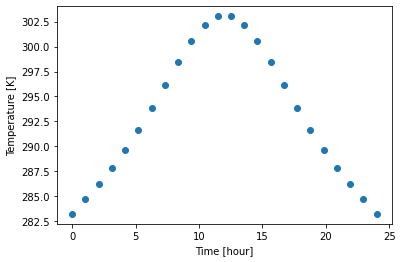

In [71]:
plt.scatter(t_m, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [72]:
T_s = interp1d(t_m, temp_m, kind='cubic') #T_s as in the formula

In [73]:
T_s(1.3445)

array(285.12786066)

In [74]:
def dTdt(T, t):
    return -0.5*(T-Ts(t))

times = np.linspace(1, 23, 1000) #say I want to find the temp distribution for 1 to 23 hours
T0 = 284.6945461 #initial temperature of the pool (say)

In [75]:
sol = odeint(dTdt, T0, times).T[0]

NameError: name 'Ts' is not defined

In [ ]:
plt.plot(times, sol, label='Shallow Water temp')
plt.scatter(t_m, temp_m, color='r', label='Outside Temp')
plt.legend()

## Linear Algebra

### Basics

Triangular matrices

$$ \begin{bmatrix} 3 & 0 & 0 & 0\\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix} $$

In [ ]:
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True) # lower=True because it is a lower triangular matrix
x

Toeplitz Matrices (matrices with constant diagonals)

$$ \begin{bmatrix} 1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix} $$

In [ ]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])    # First column of T
r = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c, r), b)
x

### Eigenvalue Problems

Eigenvalue problems can be solved using numpy, so here we focus on particular cases for optimization

In [ ]:
from scipy.linalg import eigh_tridiagonal # for solving tridiagonal matrices

$$ \begin{bmatrix} 3 & -1 & 0 & 0\\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda x $$

In [ ]:
d = 3*np.ones(4) # 3 times an array of four 1's
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e) #w = lambda in the equation

In [ ]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A

In [ ]:
np.diag(e, k=1)

In [ ]:
np.diag(e, k=-1)

In [ ]:
np.diag(d)

In [ ]:
w #eigenvalues

In [ ]:
v #eigenvectors

In [ ]:
v.T

In [ ]:
v.T[0] #first eigenvector

In [ ]:
A@v.T[0]

In [ ]:
w[0] * v.T[0]

### Special Matrices

Fiedler matrix $A_{ij} = |a_i - a_j|$ where $a_i$ is some sequence of numbers

In [ ]:
from scipy.linalg import fiedler
fiedler([1, 4, 12, 45])

Toeplitz matrices (matrices with constant diagonals)

In [ ]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,6,0,0], [1,4,5,6,0,0])

https://docs.scipy.org/doc/scipy/reference/linalg.html#special-matrices

### Decompositions

LU decomposition $A = PLU$ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [ ]:
from scipy.linalg import lu

In [ ]:
from scipy.linalg import lu
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = lu(A) # p: Permutation Matrix, l: Lower Triangular Matrix, u: Upper Triangular Matrix

In [ ]:
p

In [ ]:
l

In [ ]:
u

Choleski decomposition: find matrix $C$ such that $A = CC^T$

In [ ]:
from scipy.linalg import cholesky

In [ ]:
from scipy.linalg import cholesky
A = np.array([[1,0.2],[0.2,1]])
C = cholesky(A, lower=True)

In [ ]:
from scipy.linalg import cholesky
A = np.array([[1,0.2],[0.2,1]])
C_T = cholesky(A, lower=False)

In [ ]:
C

In [ ]:
C_T

### Sparse Matrices

Matrices that contain lots of zeros (so lots of space can be reduced)

**A Useful Example**:

The second derivative of $f(x_i) \equiv f_i$ is approximated as $\frac{d^2 f_i}{dx^2} \approx \frac{f_{i+1}+f_{i-1}-2f_i}{\Delta x^2}$. Suppose we have $f_0, ... f_4$ and $f_0=f_4=0$ (boundary conditions). Then the second derivative is approximated as 

$$ D \begin{bmatrix} f_1 \\ f_2 \\ f_3\end{bmatrix} \hspace{10mm} \text{where} \hspace{2mm} D = \frac{1}{\Delta x^2}\begin{bmatrix} -2 & 1 & 0 \\ 1 & -2 & 1 \\ 0 & 1 & -2 \end{bmatrix} $$

In 2D our function can be discretized on a grid

$$\begin{bmatrix} 0 & 0 & 0 & 0 & 0 \\ 0 & f_{11} & f_{12} & f_{13} & 0 \\ 0 & f_{21} & f_{22} & f_{23} & 0 \\ 0 & f_{31} & f_{32} & f_{33} & 0 \\ 0 & 0 & 0 & 0 & 0 \end{bmatrix} $$

but when doing this sort of work, its always better to store information in a vector

$$\begin{bmatrix} 0 & 0 & 0 & 0 & 0 \\ 0 & f_{11} & f_{12} & f_{13} & 0 \\ 0 & f_{21} & f_{22} & f_{23} & 0 \\ 0 & f_{31} & f_{32} & f_{33} & 0 \\ 0 & 0 & 0 & 0 & 0 \end{bmatrix} \to \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix}$$

What does the 2D laplacian look like? It turns out it is the "Kroncker sum" of our original matrix. The second derivative is given by

$$(D \oplus D) \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix} \hspace{10mm} \text{where} \hspace{2mm} D = \frac{1}{\Delta x^2}\begin{bmatrix} -2 & 1 & 0 \\ 1 & -2 & 1 \\ 0 & 1 & -2 \end{bmatrix} $$

Note that even though $D$ is 3x3, $D \oplus D$ is 9x9.

In [ ]:
from scipy.linalg import kron # kronecker product, NOT sum
N= 5
d = -2*np.ones(N)
e = np.ones(N-1)
D = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
D_kronsum = kron(D, np.identity(N)) + kron(np.identity(N),D)

# the Kronecker Sum is defined in the terms of the Kronecker Product.It is the Kronecker Product of D with the Identity Matrix + Kronecker Product of the Identity Matrix with D.

In [ ]:
D

In [ ]:
D_kronsum

Which is too big for any reasonable calculation! But can use sparse matrices

In [ ]:
from scipy import sparse
N=100
diag = np.ones([N]) #creating a vector with N 1's

#creating the toeplitz matrix
diags = np.array([diag, -2*diag, diag]) # specifying the diagonals

D = sparse.spdiags(diags, np.array([-1,0,1]), N, N) # 0 means the main diagonal, -1 means one below the main diagonal, and 1 means one above the main diagonal
T = -1/2 * sparse.kronsum(D,D)

In [ ]:
D

In [ ]:
T

### Statistics

**Example 1**: $\beta$ distribution

$$ f(x; a, b) = \frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \hspace{20mm} 0 \leq x \leq 1$$

In [77]:
from scipy.stats import beta

Basic Statistics

In [80]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')# mean, variance, skewness, kurtosis = "mvsk"

In [81]:
var

array(0.03744395)

In [82]:
kurt

array(-0.66953054)

Probability Distribution Function Plotting

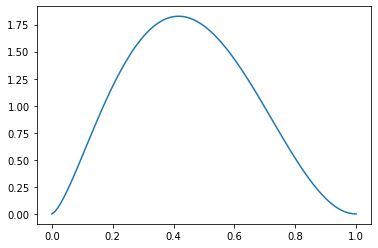

In [83]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

In [84]:
beta.ppf?

Signature: beta.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
x : array_like
    quantile corresponding to the lower tail probability q.
File:      c:\users\priya\appdata\local\programs\python\python310\lib\site-packages\scipy\stats\_distn_infrastructure.py
Type:      method


In [85]:
beta.cdf?

Signature: beta.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
File:      c:\users\priya\appdata\local\programs\python\python310\lib\site-packages\scipy\stats\_distn_infrastructure.py
Type:      method


Generating Random Variables

In [86]:
r = beta.rvs(a, b, size=10)
r

array([0.45953668, 0.48299203, 0.405428  , 0.59004405, 0.80873371,
       0.24869311, 0.66383656, 0.49507173, 0.77181086, 0.52773511])

**Example 2**: Gaussian Distribution

$$ f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{exp}\left(-\frac{(x-\mu)^2}{\sigma^2} \right) \hspace{20mm} -\infty < x \leq \infty $$

In [87]:
from scipy.stats import norm

In [89]:
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv') #mu and sigma already give the mean and sqrt(SD)
#Technically this is a normal distribution with mean = 0 and SD = 1, but we can specify the location (loc) and scale.
# moments = "mv" means that the output will contain only mean and variance out of the many things the function can generate

In [90]:
mean

array(1.)

In [91]:
var

array(4.)

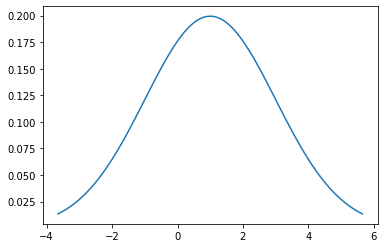

In [93]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)# the points had to be chosen as 0.01 and 0.99 as 0 annd 1 correspond to negative and positive infinities
plt.plot(x, norm.pdf(x, mu, sigma))

**Example 3**: Multinomial Distribution

$$ f(x_1, x_2, ..., x_k; p_1, p_2, ... p_k, n) = \frac{n!}{x_1! ... x_k!}p_1^{x_1}p_2^{x_2}...p_k^{x_k}$$

Rolling a die

In [94]:
from scipy.stats import multinomial

p = np.ones(6)/6
multinomial.pmf([6,0,0,0,0,0], n=6, p=p)

2.143347050754453e-05

In [95]:
multinomial.pmf?

Signature: multinomial.pmf(x, n, p)
Docstring:
Multinomial probability mass function.

Parameters
----------
x : array_like
    Quantiles, with the last axis of `x` denoting the components.
n : int
    Number of trials
p : array_like
    Probability of a trial falling into each category; should sum to 1

Returns
-------
pmf : ndarray or scalar
    Probability density function evaluated at `x`

Notes
-----
`n` should be a positive integer. Each element of `p` should be in the
interval :math:`[0,1]` and the elements should sum to 1. If they do not sum to
1, the last element of the `p` array is not used and is replaced with the
remaining probability left over from the earlier elements.
File:      c:\users\priya\appdata\local\programs\python\python310\lib\site-packages\scipy\stats\_multivariate.py
Type:      method


In [96]:
p

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [98]:
multinomial.rvs(n=100, p=p, size=5) # this means that I do a hundred rolls (of the die) and I have six diferent options (p). I repeat the process five times (size=5). See that the numbers in each element of the array add up to 100

array([[21, 12, 18, 14, 13, 22],
       [10, 23, 19, 19, 12, 17],
       [11, 16, 18, 20, 15, 20],
       [16, 16, 17, 15, 21, 15],
       [16, 14, 20, 18, 15, 17]])

**Example 4**: Generating Random Numbers from your own distribution

$$ f(x; a_1, a_2, b_1, b_2) = \frac{1}{2(a_1b_1+a_2b_2)} \left(b_1\exp\left(-\sqrt{\frac{x}{a_1}}\right)+b_2\exp\left(-\sqrt{\frac{x}{a_2}}\right)\right) \hspace{20mm} 0 \leq x \leq \infty $$

In [100]:
import scipy.stats as st

class mr_p_solver_dist(st.rv_continuous): #OOP
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
my_rv = mr_p_solver_dist(a=0, b=np.inf)

In [101]:
a1, a2, b1, b2 = 2, 3, 1, 2
x = np.linspace(my_rv.ppf(0.01, a1, a2, b1, b2), my_rv.ppf(0.99, a1, a2, b1, b2), 100)
y = my_rv.pdf(x, a1, a2, b1, b2)

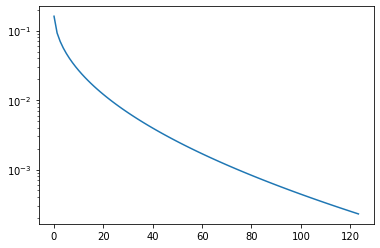

In [102]:
plt.plot(x, y)
plt.semilogy()
plt.show()

In [103]:
my_rv.rvs(a1, a2, b1, b2, size=10)

array([11.40880716,  3.38833446,  6.99335181, 36.10280619,  2.0447312 ,
       11.96041375,  2.89675457,  7.33755671,  3.04511559, 16.35967539])